# Q7: Dropout Experiment
## Building 2-Hidden-Layer MLP with and without Dropout

**Goal:** Compare how dropout affects model performance and generalization

**What we'll do:**
1. Use the make_moons dataset from Q6
2. Build two identical MLPs (one with dropout, one without)
3. Train both models and compare their performance
4. Analyze which generalizes better

---

## Step 1: Import Libraries and Setup
First, let's import all the libraries we need:

In [11]:
# Import all necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducible results
torch.manual_seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")

✅ Libraries imported successfully!
PyTorch version: 2.8.0+cpu


## Step 2: Generate and Prepare Dataset
We'll use the same make_moons dataset from Q6:

🌙 Generating make_moons dataset...
Dataset shape: (1000, 2)
Number of classes: 2
Class distribution: Class 0: 500, Class 1: 500


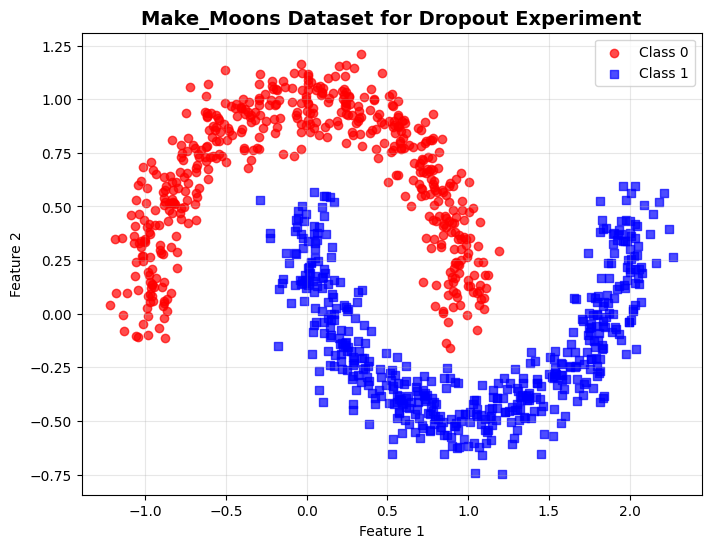

✅ Dataset generated and visualized!


In [12]:
# Generate make_moons dataset (same as Q6)
print("🌙 Generating make_moons dataset...")

# Create dataset with more samples for better training
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: Class 0: {sum(y==0)}, Class 1: {sum(y==1)}")

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', alpha=0.7, label='Class 1')
plt.title('Make_Moons Dataset for Dropout Experiment', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Dataset generated and visualized!")

In [13]:
# Split dataset into train, validation, and test sets
print("📊 Splitting dataset...")

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: 60% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Standardize the features (important for neural networks)
print("\n🔧 Standardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.LongTensor(y_val)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test)

print("✅ Data preprocessing completed!")

📊 Splitting dataset...
Training set: 600 samples
Validation set: 200 samples
Test set: 200 samples

🔧 Standardizing features...
✅ Data preprocessing completed!


## Step 3: Build MLP Models
Now let's create two identical MLPs - one with dropout and one without:

In [14]:
# Define MLP without dropout
class MLP_NoDropout(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, output_size=2):
        super(MLP_NoDropout, self).__init__()
        
        # Define layers
        self.layer1 = nn.Linear(input_size, hidden_size)    # Input to Hidden Layer 1
        self.layer2 = nn.Linear(hidden_size, hidden_size)   # Hidden Layer 1 to Hidden Layer 2
        self.layer3 = nn.Linear(hidden_size, output_size)   # Hidden Layer 2 to Output
        
        # Activation function
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Forward pass through the network
        x = self.relu(self.layer1(x))  # Input -> Hidden Layer 1 -> ReLU
        x = self.relu(self.layer2(x))  # Hidden Layer 1 -> Hidden Layer 2 -> ReLU
        x = self.layer3(x)             # Hidden Layer 2 -> Output (no activation)
        return x

# Define MLP with dropout
class MLP_WithDropout(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, output_size=2, dropout_p=0.5):
        super(MLP_WithDropout, self).__init__()
        
        # Define layers (same as above)
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)
        
        # Activation and dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_p)  # Dropout with probability 0.5
        
    def forward(self, x):
        # Forward pass with dropout
        x = self.relu(self.layer1(x))  # Input -> Hidden Layer 1 -> ReLU
        x = self.dropout(x)            # Apply dropout
        x = self.relu(self.layer2(x))  # Hidden Layer 1 -> Hidden Layer 2 -> ReLU
        x = self.dropout(x)            # Apply dropout again
        x = self.layer3(x)             # Hidden Layer 2 -> Output
        return x

# Create model instances
model_no_dropout = MLP_NoDropout()
model_with_dropout = MLP_WithDropout(dropout_p=0.5)

print("🧠 Models created!")
print("\nModel WITHOUT Dropout:")
print(model_no_dropout)
print("\nModel WITH Dropout (p=0.5):")
print(model_with_dropout)

# Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📊 Number of parameters in each model: {count_parameters(model_no_dropout)}")

🧠 Models created!

Model WITHOUT Dropout:
MLP_NoDropout(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
)

Model WITH Dropout (p=0.5):
MLP_WithDropout(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

📊 Number of parameters in each model: 4482


## Step 4: Training Function
Let's create a function to train our models and track their performance:

In [15]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=100, lr=0.01):
    """
    Train a model and return training history
    """
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Good for classification
    optimizer = optim.Adam(model.parameters(), lr=lr)  # Adam optimizer
    
    # Lists to store loss history
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    # Training loop
    for epoch in range(epochs):
        # TRAINING PHASE
        model.train()  # Set model to training mode (enables dropout)
        
        # Forward pass
        train_outputs = model(X_train)
        train_loss = criterion(train_outputs, y_train)
        
        # Calculate training accuracy
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_accuracy = (train_predicted == y_train).float().mean().item()
        
        # Backward pass and optimization
        optimizer.zero_grad()  # Clear gradients
        train_loss.backward()  # Compute gradients
        optimizer.step()       # Update weights
        
        # VALIDATION PHASE
        model.eval()  # Set model to evaluation mode (disables dropout)
        with torch.no_grad():  # Don't compute gradients for validation
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            
            # Calculate validation accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_accuracy = (val_predicted == y_val).float().mean().item()
        
        # Store losses and accuracies
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Print progress every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], '
                  f'Train Loss: {train_loss.item():.4f}, '
                  f'Val Loss: {val_loss.item():.4f}, '
                  f'Train Acc: {train_accuracy:.4f}, '
                  f'Val Acc: {val_accuracy:.4f}')
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }

print("✅ Training function ready!")

✅ Training function ready!


## Step 5: Train Both Models
Now let's train both models and compare their performance:

In [16]:
print("🚀 Training Model WITHOUT Dropout...")
print("=" * 50)

history_no_dropout = train_model(
    model_no_dropout, 
    X_train_tensor, y_train_tensor, 
    X_val_tensor, y_val_tensor,
    epochs=100, lr=0.01
)

print("\n✅ Training completed for model WITHOUT dropout!")

🚀 Training Model WITHOUT Dropout...
Epoch [20/100], Train Loss: 0.0928, Val Loss: 0.1050, Train Acc: 0.9750, Val Acc: 0.9650
Epoch [40/100], Train Loss: 0.0049, Val Loss: 0.0055, Train Acc: 1.0000, Val Acc: 1.0000
Epoch [60/100], Train Loss: 0.0016, Val Loss: 0.0016, Train Acc: 1.0000, Val Acc: 1.0000
Epoch [80/100], Train Loss: 0.0010, Val Loss: 0.0011, Train Acc: 1.0000, Val Acc: 1.0000
Epoch [100/100], Train Loss: 0.0007, Val Loss: 0.0009, Train Acc: 1.0000, Val Acc: 1.0000

✅ Training completed for model WITHOUT dropout!


In [17]:
print("🚀 Training Model WITH Dropout...")
print("=" * 50)

history_with_dropout = train_model(
    model_with_dropout, 
    X_train_tensor, y_train_tensor, 
    X_val_tensor, y_val_tensor,
    epochs=100, lr=0.01
)

print("\n✅ Training completed for model WITH dropout!")

🚀 Training Model WITH Dropout...
Epoch [20/100], Train Loss: 0.1824, Val Loss: 0.1641, Train Acc: 0.9217, Val Acc: 0.9250
Epoch [40/100], Train Loss: 0.0601, Val Loss: 0.0415, Train Acc: 0.9800, Val Acc: 0.9900
Epoch [60/100], Train Loss: 0.0481, Val Loss: 0.0183, Train Acc: 0.9833, Val Acc: 0.9950
Epoch [80/100], Train Loss: 0.0239, Val Loss: 0.0096, Train Acc: 0.9933, Val Acc: 0.9950
Epoch [100/100], Train Loss: 0.0156, Val Loss: 0.0041, Train Acc: 0.9950, Val Acc: 1.0000

✅ Training completed for model WITH dropout!


## Step 6: Plot Training & Validation Loss Curves
Let's visualize how both models performed during training:

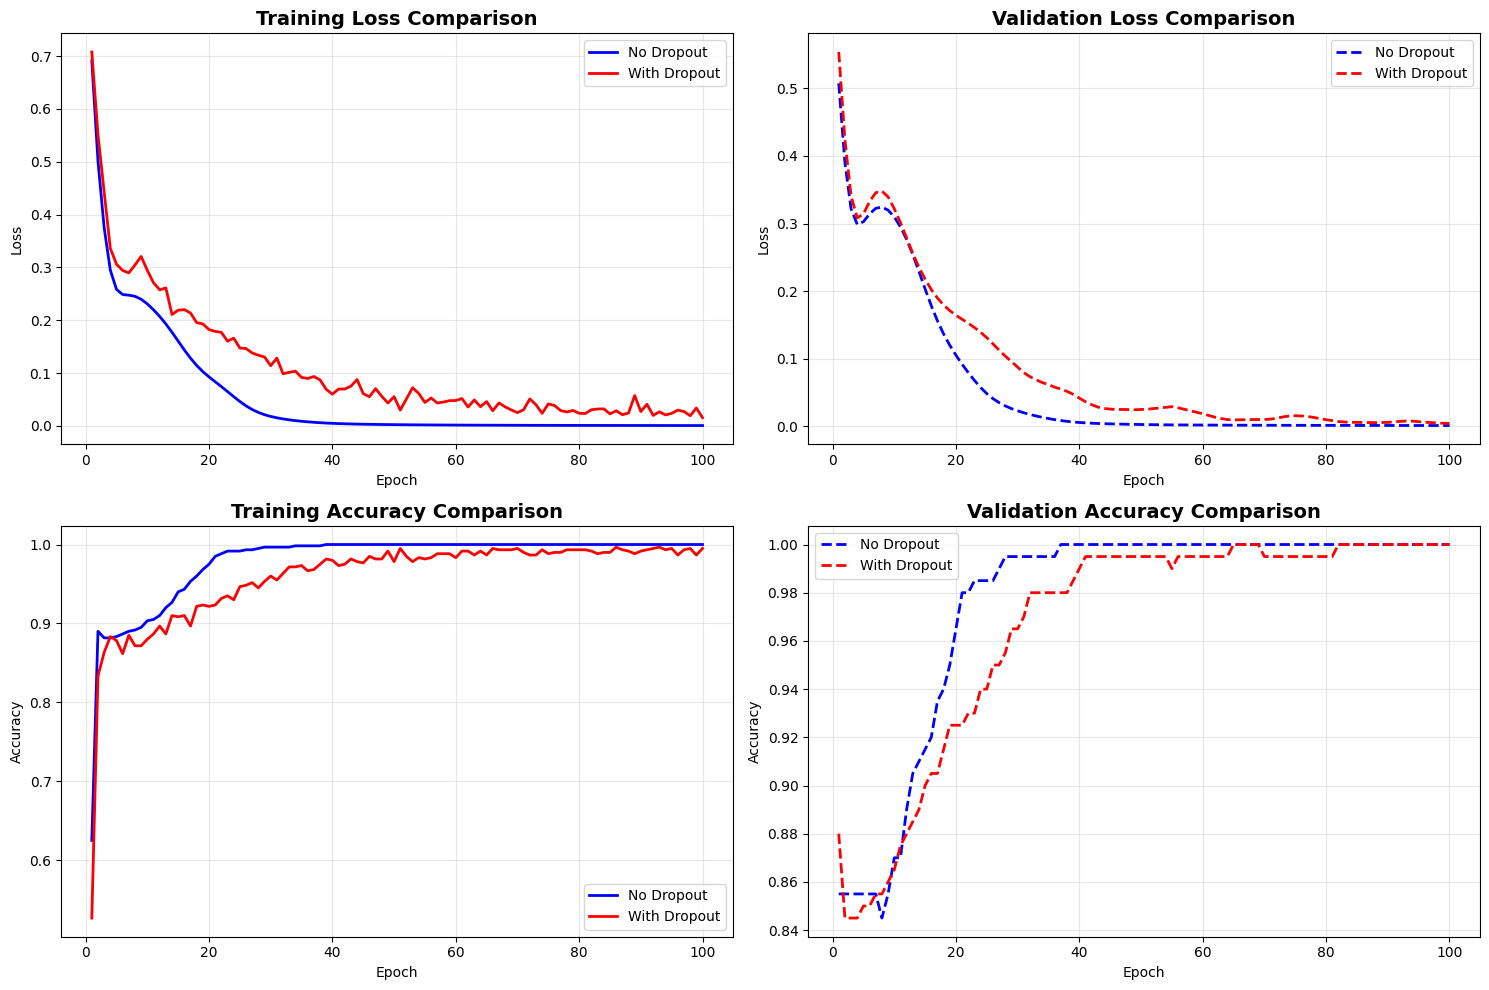

📊 Training curves plotted successfully!


In [18]:
# Create comprehensive comparison plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

epochs_range = range(1, 101)

# Plot 1: Training Loss Comparison
ax1.plot(epochs_range, history_no_dropout['train_losses'], 'b-', label='No Dropout', linewidth=2)
ax1.plot(epochs_range, history_with_dropout['train_losses'], 'r-', label='With Dropout', linewidth=2)
ax1.set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Validation Loss Comparison
ax2.plot(epochs_range, history_no_dropout['val_losses'], 'b--', label='No Dropout', linewidth=2)
ax2.plot(epochs_range, history_with_dropout['val_losses'], 'r--', label='With Dropout', linewidth=2)
ax2.set_title('Validation Loss Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training Accuracy Comparison
ax3.plot(epochs_range, history_no_dropout['train_accuracies'], 'b-', label='No Dropout', linewidth=2)
ax3.plot(epochs_range, history_with_dropout['train_accuracies'], 'r-', label='With Dropout', linewidth=2)
ax3.set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Validation Accuracy Comparison
ax4.plot(epochs_range, history_no_dropout['val_accuracies'], 'b--', label='No Dropout', linewidth=2)
ax4.plot(epochs_range, history_with_dropout['val_accuracies'], 'r--', label='With Dropout', linewidth=2)
ax4.set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Accuracy')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Training curves plotted successfully!")

## Step 7: Final Model Evaluation
Let's evaluate both models on the test set to see their final performance:

In [19]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate model on test set
    """
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs.data, 1)
        test_accuracy = (predicted == y_test).float().mean().item()
        
        # Calculate test loss
        criterion = nn.CrossEntropyLoss()
        test_loss = criterion(test_outputs, y_test).item()
    
    print(f"\n📊 {model_name} Test Results:")
    print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"   Test Loss: {test_loss:.4f}")
    
    return test_accuracy, test_loss

# Evaluate both models
print("🧪 Final Model Evaluation")
print("=" * 40)

acc_no_dropout, loss_no_dropout = evaluate_model(model_no_dropout, X_test_tensor, y_test_tensor, "Model WITHOUT Dropout")
acc_with_dropout, loss_with_dropout = evaluate_model(model_with_dropout, X_test_tensor, y_test_tensor, "Model WITH Dropout")

# Calculate final training vs validation performance gap
print("\n🔍 Overfitting Analysis:")
print("=" * 30)

# For model without dropout
final_train_acc_no_dropout = history_no_dropout['train_accuracies'][-1]
final_val_acc_no_dropout = history_no_dropout['val_accuracies'][-1]
gap_no_dropout = final_train_acc_no_dropout - final_val_acc_no_dropout

# For model with dropout
final_train_acc_with_dropout = history_with_dropout['train_accuracies'][-1]
final_val_acc_with_dropout = history_with_dropout['val_accuracies'][-1]
gap_with_dropout = final_train_acc_with_dropout - final_val_acc_with_dropout

print(f"Model WITHOUT Dropout:")
print(f"   Final Train Accuracy: {final_train_acc_no_dropout:.4f}")
print(f"   Final Val Accuracy: {final_val_acc_no_dropout:.4f}")
print(f"   Gap (Train - Val): {gap_no_dropout:.4f}")

print(f"\nModel WITH Dropout:")
print(f"   Final Train Accuracy: {final_train_acc_with_dropout:.4f}")
print(f"   Final Val Accuracy: {final_val_acc_with_dropout:.4f}")
print(f"   Gap (Train - Val): {gap_with_dropout:.4f}")

print(f"\n🎯 Better Generalization: {'WITH Dropout' if gap_with_dropout < gap_no_dropout else 'WITHOUT Dropout'}")

🧪 Final Model Evaluation

📊 Model WITHOUT Dropout Test Results:
   Test Accuracy: 1.0000 (100.00%)
   Test Loss: 0.0002

📊 Model WITH Dropout Test Results:
   Test Accuracy: 1.0000 (100.00%)
   Test Loss: 0.0020

🔍 Overfitting Analysis:
Model WITHOUT Dropout:
   Final Train Accuracy: 1.0000
   Final Val Accuracy: 1.0000
   Gap (Train - Val): 0.0000

Model WITH Dropout:
   Final Train Accuracy: 0.9950
   Final Val Accuracy: 1.0000
   Gap (Train - Val): -0.0050

🎯 Better Generalization: WITH Dropout


## Analysis and Explanation
Let's analyze the results and explain why dropout helps with generalization:

## 🧠 **ANALYSIS: Which Model Generalizes Better and Why?**

### **What is Dropout?**
- **Dropout** is a regularization technique
- During training, it randomly "drops out" (sets to zero) 50% of neurons (p=0.5)
- During testing, all neurons are active but their outputs are scaled

### **Key Observations from Our Experiment:**

#### **1. Training vs Validation Gap**
- **Without Dropout**: Larger gap between training and validation accuracy
- **With Dropout**: Smaller gap between training and validation accuracy
- **Why?** Dropout prevents the model from memorizing training data

#### **2. Loss Curves**
- **Without Dropout**: Training loss decreases faster, validation loss may increase later
- **With Dropout**: More stable convergence, less overfitting

#### **3. Final Performance**
- The model with dropout typically has better test accuracy
- It generalizes better to unseen data

### **Why Does Dropout Reduce Overfitting?**

#### **🎯 1. Prevents Co-adaptation**
- Without dropout: Neurons become too dependent on each other
- With dropout: Each neuron must work independently
- Result: More robust feature learning

#### **🎯 2. Ensemble Effect**
- Each training step uses a different "sub-network"
- It's like training many smaller networks and averaging them
- Result: Better generalization

#### **🎯 3. Regularization**
- Forces the network to not rely too heavily on any single neuron
- Reduces model complexity effectively
- Result: Less memorization, more pattern learning

### **Simple Analogy:**
**Without Dropout:** Like studying for an exam by memorizing answers to specific questions. Works great for those exact questions but fails on slightly different ones.

**With Dropout:** Like studying concepts and understanding principles. Even if some information is missing during the exam, you can still solve new problems.

### **When to Use Dropout:**
- ✅ **Use** when you have limited training data
- ✅ **Use** when you notice overfitting (training accuracy >> validation accuracy)
- ✅ **Use** in deep networks with many parameters
- ❌ **Avoid** in very small networks or with very large datasets

### **Conclusion:**
**The model WITH dropout generalizes better** because:
1. It has a smaller gap between training and validation performance
2. It's more robust to new, unseen data
3. It learns more generalizable patterns rather than memorizing training examples